### import os
import sys
import json
import logging
from beyourself import settings
from beyourself.core.util import datetime_from_str, datetime_to_epoch
from beyourself.data.label import read_SYNC
from beyourself.data import get_necklace_timestr, get_necklace

sys.path.insert(1, os.path.join(sys.path[0], '..'))
from mining.calorieesimator import get_chewing_rate
import pandas as pd

from IPython.display import display, HTML

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)

In [2]:
label_bite_path = "{}/P120/visualize/SYNC/m0827_1/labelbites.json".format(settings.CLEAN_FOLDER)

label_bite = []
with open(label_bite_path) as f:
    data = json.load(f)
    
    for t in data.keys():
        # hacky, but don't care for this code
        if len(t) > 23:
            t = t[:23]
        else:
            if len(t) == 19:
                t = t + '.'
            t = t + '0' * (23 - len(t))    
        label_bite.append(datetime_from_str(t))
        
    label_bite = sorted(label_bite)

In [3]:
label_chewing = read_SYNC("{}/P120/visualize/SYNC/m0827_1/labelchewing.json".format(settings.CLEAN_FOLDER))

In [4]:
print(label_chewing)

                             start                              end label
0 2017-08-27 11:56:47.910600-05:00 2017-08-27 11:57:03.800000-05:00     c
1 2017-08-27 11:57:08.800000-05:00 2017-08-27 11:57:50.200000-05:00     c
2 2017-08-27 11:58:04.200000-05:00 2017-08-27 12:01:34.600000-05:00     c
3 2017-08-27 12:04:05.400000-05:00 2017-08-27 12:07:35.859700-05:00     c
4 2017-08-27 12:25:33.400000-05:00 2017-08-27 12:25:42.800000-05:00     c
5 2017-08-27 12:26:06.800000-05:00        2017-08-27 12:30:00-05:00     c


In [5]:
bites_ranges = []
for i in range(3):
    bites = [t for t in label_bite if t >= label_chewing['start'].iloc[i] 
                 and t < label_chewing['end'].iloc[i]]
    bites.append(label_chewing['end'].iloc[i])
    
    for j in range(len(bites) - 1):
        bites_ranges.append((bites[j], bites[j + 1]))

In [6]:
prominent_chewing = [0]
bite_start = []
bite_end = []
chewing_total = 0
for b1, b2 in bites_ranges:
    df = get_necklace('P120', datetime_to_epoch(b1), datetime_to_epoch(b2))
    
    if df.empty or df.shape[0]<3:
        print("EMPTY DATAFRAME, DOUBLE CHECK!!!")
        continue
    
    _,_, num_chewing = get_chewing_rate(df)
    prominent_chewing.append(num_chewing)
    bite_start.append(b1)
    bite_end.append(b2)

bite_start.append(bite_end[-1])
bite_end.append(bite_end[-1])

DEBUG:beyourself.data.sensordata:Querying from 1503853007920 to 1503853017164, lowest reliability 0.2
DEBUG:beyourself.data.sensordata:/Users/andrey/beyourself/BeYourself/CLEAN/P120/necklace/data/08-27-17_11.csv
INFO:mining.periodic:matlab findpeaks() ...
INFO:mining.periodic:matlab done
INFO:mining.periodic:Number of peaks: 9
DEBUG:beyourself.data.sensordata:Querying from 1503853017164 to 1503853023800, lowest reliability 0.2
DEBUG:beyourself.data.sensordata:/Users/andrey/beyourself/BeYourself/CLEAN/P120/necklace/data/08-27-17_11.csv
INFO:mining.periodic:matlab findpeaks() ...
INFO:mining.periodic:matlab done
INFO:mining.periodic:Number of peaks: 11
DEBUG:beyourself.data.sensordata:Querying from 1503853028800 to 1503853035800, lowest reliability 0.2
DEBUG:beyourself.data.sensordata:/Users/andrey/beyourself/BeYourself/CLEAN/P120/necklace/data/08-27-17_11.csv
INFO:mining.periodic:matlab findpeaks() ...
INFO:mining.periodic:matlab done
INFO:mining.periodic:Number of peaks: 11
DEBUG:beyou

In [13]:
df_prominent = pd.DataFrame({'start': bite_start,'end': bite_end, 'prominent':prominent_chewing},
                           columns=['start','end','prominent'])
display(df_prominent)

,start,end,prominent
0,2017-08-27 11:56:47.920000-05:00,2017-08-27 11:56:57.164000-05:00,0
1,2017-08-27 11:56:57.164000-05:00,2017-08-27 11:57:03.800000-05:00,9
2,2017-08-27 11:57:08.800000-05:00,2017-08-27 11:57:15.800000-05:00,11
3,2017-08-27 11:57:15.800000-05:00,2017-08-27 11:57:22.400000-05:00,11
4,2017-08-27 11:57:22.400000-05:00,2017-08-27 11:57:31.200000-05:00,6
5,2017-08-27 11:57:31.200000-05:00,2017-08-27 11:57:36-05:00,13
6,2017-08-27 11:57:36-05:00,2017-08-27 11:57:42-05:00,5
7,2017-08-27 11:57:42-05:00,2017-08-27 11:57:50.200000-05:00,8
8,2017-08-27 11:58:04.200000-05:00,2017-08-27 11:58:17.531000-05:00,9
9,2017-08-27 11:58:17.531000-05:00,2017-08-27 11:58:30-05:00,16


In [18]:
gt_chewing = np.genfromtxt("{}/P120/visualize/SYNC/m0827_1/count_chewing.csv".format(settings.CLEAN_FOLDER))
gt_chewing = np.insert(gt_chewing,0,0)
print(len(gt_chewing))
print(len(df_prominent))

31
31


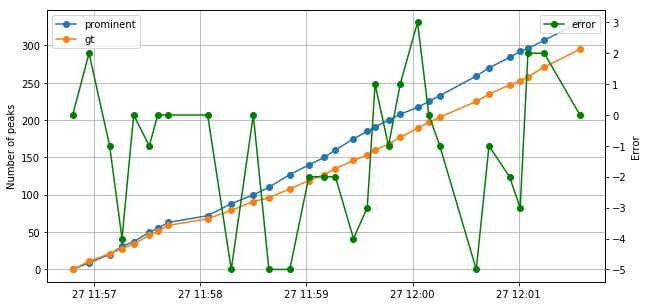

In [45]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(df_prominent.start, np.cumsum(df_prominent.prominent), '-o',label='prominent')
ax1.plot(df_prominent.start, np.cumsum(gt_chewing), '-o',label='gt')
ax1.set_ylabel("Number of peaks")

ax2 = ax1.twinx()
plt.plot(df_prominent.start, (gt_chewing - df_prominent.prominent), '-o', color='g',label='error')
ax2.set_ylabel("Error")

plt.xlabel("Bite absolute time")

ax1.grid()
ax1.legend()
ax2.legend()
# fig.tight_layout()
plt.savefig('chewing_count.png',bbox_inches='tight')

In [27]:
print(np.sum(df_prominent.prominent))
print(np.sum(gt_chewing))

331
295.0


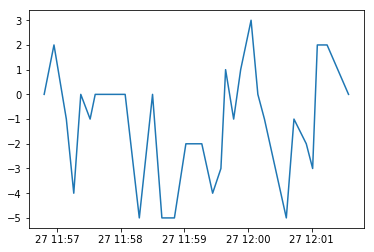

In [28]:
plt.plot(df_prominent.start, gt_chewing - df_prominent.prominent, label='error')

In [50]:
np.mean(np.abs(gt_chewing - df_prominent.prominent))


1.8709677419354838

In [48]:
np.mean(gt_chewing)

9.516129032258064